<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/hw2/q3/HW2Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3.1

In [6]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 23.4MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [5]:
from PIL import Image

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity in grayscale.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Convert the image to grayscale.
    grayscale_image = image.convert("L")  # "L" mode is for grayscale

    # Determine the image's width and height in pixels.
    width, height = grayscale_image.size

    # Load pixel values for the grayscale image.
    pix = grayscale_image.load()

    # Define a threshold for binary conversion.
    threshold = 128  # Middle of 0-255 grayscale range

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the grayscale image.
    for i in range(width):
        for j in range(height):
            # Get the grayscale intensity value of the pixel.
            intensity = pix[i, j]

            # Determine whether the pixel is above or below the threshold.
            if intensity > threshold:
                binary_representation.append(-1)  # White
            else:
                binary_representation.append(1)  # Black

    # Return the binary representation of the image.
    return binary_representation


In [27]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 500

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


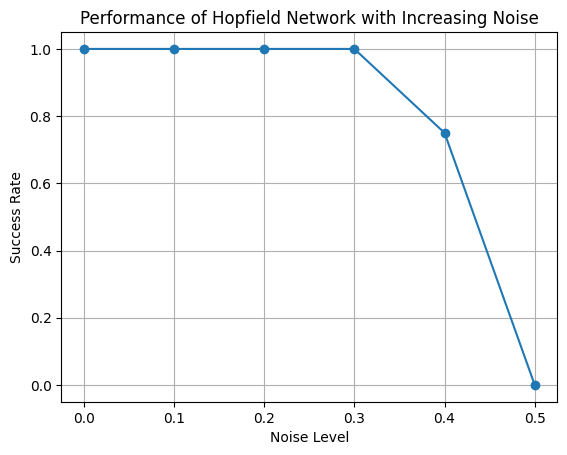

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self):
        self.weights = None

    def train(self, patterns):
        """
        Train the Hopfield network with given patterns.
        Args:
            patterns (numpy.ndarray): Patterns to store in the network.
        """
        num_neurons = patterns.shape[1]
        self.weights = np.zeros((num_neurons, num_neurons))

        # Hebbian learning rule
        for p in patterns:
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def recall(self, pattern, steps=10):
        """
        Recall a pattern using the network.
        Args:
            pattern (numpy.ndarray): Input pattern.
            steps (int): Number of steps to update the pattern.
        Returns:
            numpy.ndarray: Recalled pattern.
        """
        output = pattern.copy()
        for _ in range(steps):
            output = np.sign(self.weights @ output)
        return output

# Helper functions
def generate_patterns(num_patterns, size):
    """
    Generate random binary patterns (-1, 1).
    """
    return np.random.choice([-1, 1], size=(num_patterns, size))

def add_noise(pattern, noise_level):
    """
    Add noise to a pattern by flipping bits.
    Args:
        pattern (numpy.ndarray): Original pattern.
        noise_level (float): Fraction of bits to flip.
    Returns:
        numpy.ndarray: Noisy pattern.
    """
    noisy = pattern.copy()
    num_flips = int(noise_level * len(pattern))
    flip_indices = np.random.choice(len(pattern), size=num_flips, replace=False)
    noisy[flip_indices] *= -1
    return noisy

# Initialize parameters
num_patterns = 4
pattern_size = 100
noise_levels = np.linspace(0, 0.5, 6)  # Noise levels from 0% to 50%

# Generate patterns and train the network
patterns = generate_patterns(num_patterns, pattern_size)
network = HopfieldNetwork()
network.train(patterns)

# Test the network with noisy inputs
success_rates = []
for noise_level in noise_levels:
    success_count = 0
    for pattern in patterns:
        noisy_pattern = add_noise(pattern, noise_level)
        recalled_pattern = network.recall(noisy_pattern)
        if np.array_equal(recalled_pattern, pattern):
            success_count += 1
    success_rates.append(success_count / num_patterns)

# Plot results
plt.plot(noise_levels, success_rates, marker='o')
plt.title("Performance of Hopfield Network with Increasing Noise")
plt.xlabel("Noise Level")
plt.ylabel("Success Rate")
plt.grid()
plt.show()


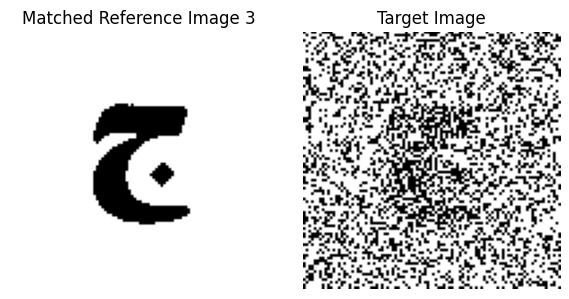

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class NeuralMatcher:
    def __init__(self, reference_images):
        self.reference_images = [img.flatten() for img in reference_images]

    def find_closest(self, target_image):
        target_image = target_image.flatten()
        differences = [np.sum(target_image != ref_image) for ref_image in self.reference_images]
        closest_index = np.argmin(differences)
        closest_image_array = self.reference_images[closest_index].reshape(96, 96)
        closest_image = Image.fromarray((closest_image_array * 255).astype(np.uint8))
        return closest_index, closest_image

def process_image(filepath, dimensions=(96, 96)):
    image = Image.open(filepath).convert("L")
    image = image.resize(dimensions)
    binary_image = np.array(image) > 75
    return binary_image.astype(np.int8)

reference_image_paths = ["/content/1.jpg",
                         "/content/2.jpg",
                         "/content/3.jpg",
                         "/content/4.jpg",
                         "/content/5.jpg"]
target_image_path = "noisy3.jpg"
reference_images = [process_image(path) for path in reference_image_paths]
target_image = process_image(target_image_path)
matcher = NeuralMatcher(reference_images)
closest_index, closest_image = matcher.find_closest(target_image)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(closest_image, cmap='gray')
axes[0].set_title(f"Matched Reference Image {closest_index + 1}")
axes[0].axis("off")
axes[1].imshow(target_image, cmap='gray')
axes[1].set_title("Target Image")
axes[1].axis("off")
plt.tight_layout()
plt.show()


In [30]:
from PIL import Image, ImageDraw
import random

def create_noisy_images():
    paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for idx, path in enumerate(paths, start=1):
        output_path = f"/content/MissingPoint{idx}.jpg"
        apply_noise(path, output_path)
        print(f"Processed: {output_path}")

def apply_noise(input_path, output_path):
    img = Image.open(input_path)
    drawer = ImageDraw.Draw(img)
    w, h = img.size
    pixels = img.load()
    noise_limit = 500

    for x in range(w):
        for y in range(h):
            noise = random.randint(0, noise_limit)
            r = max(0, min(255, pixels[x, y][0] + noise))
            g = max(0, min(255, pixels[x, y][1] + noise))
            b = max(0, min(255, pixels[x, y][2] + noise))
            drawer.point((x, y), (r, g, b))

    img.save(output_path, "JPEG")
    del drawer

create_noisy_images()


Processed: /content/MissingPoint1.jpg
Processed: /content/MissingPoint2.jpg
Processed: /content/MissingPoint3.jpg
Processed: /content/MissingPoint4.jpg
Processed: /content/MissingPoint5.jpg


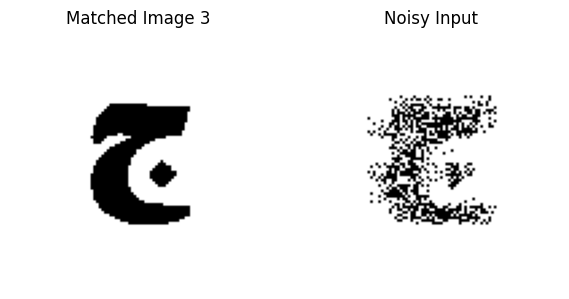

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess images
def preprocess_image(path, dimensions=(96, 96)):
    img = Image.open(path).convert("L").resize(dimensions)
    threshold = np.mean(img)  # آستانه پویا بر اساس میانگین پیکسل‌ها
    binary_image = np.array(img) > threshold

    return binary_image.astype(np.int8)

# Paths
original_paths = ["/content/1.jpg"
, "/content/2.jpg"
, "/content/3.jpg",
                  "/content/4.jpg",
                  "/content/5.jpg"]
noisy_path = "MissingPoint3.jpg"

# Preprocessing
original_images = [preprocess_image(p) for p in original_paths]
noisy_image = preprocess_image(noisy_path)

# Initialize network and find match
network = HammingNetwork(original_images)
result_index, result_image = network.match(noisy_image)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(result_image, cmap='gray')
axs[0].set_title(f"Matched Image {result_index + 1}")
axs[0].axis("off")

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title("Noisy Input")
axs[1].axis("off")

plt.tight_layout()
plt.show()
